### Import Data

In [22]:
import re
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd 
import numpy as np
import collections
import regex as re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
nltk.download('stopwords')
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [1]:
# Membuka file artikel.txt untuk dibaca
with open('C:/Dzakiy/articles.txt', 'r', encoding ='utf-8') as file:
    # Membaca isi file dan menyimpannya dalam variabel
    artikel = file.read()

In [3]:
print(artikel)

﻿Image copyright EPA Image caption Uber has been criticised many times over the way it runs its business


Ride-sharing firm Uber is facing a criminal investigation by the US government.


The scrutiny has started because the firm is accused of using "secret" software that let it operate in regions where it was banned or restricted.


The software, called "greyball", helped it identify officials seeking to stop the service running.


A spokesman for Uber declined to comment on the investigation, reported the Reuters news agency.


It is claimed greyball was used in several areas, including Portland, Oregon, where the ride service was still seeking official approval to operate.


Bookings blocked


In those areas, transport regulation officials posed as passengers in a bid to prove that the company was operating illegally. Greyball worked out who the officials were and blocked them from booking rides with the company's drivers.


In a letter sent last week to transport regulators in Por

### Mengambil Baris ke 4 dari Artikel

In [5]:
lines = re.split(r'\n\n\n', artikel)

line4 = lines[3]
print(line4)

The software, called "greyball", helped it identify officials seeking to stop the service running.


### Menghilangkan tanda baca " " pada baris ke 4

In [6]:
cleansed_sentence = re.sub(r'[""]', '', line4)
print(cleansed_sentence)

The software, called greyball, helped it identify officials seeking to stop the service running.


### Tokenisasi baris ke 4

In [16]:
tokenized_sent = word_tokenize(cleansed_sentence)
unique_tokens = set(word_tokenize(cleansed_sentence))
print(unique_tokens)

{'identify', 'service', 'The', 'helped', 'to', 'the', 'called', 'seeking', 'stop', 'running', 'software', ',', 'it', 'officials', '.', 'greyball'}


### Tokenisasi seluruh artikel

In [17]:
tokenized_sent1 = word_tokenize(artikel)
unique_tokens1 = set(word_tokenize(artikel))
print(unique_tokens1)

{'Carnegie', 'sfchronicle.com', 'decidedly', 'Osborne', 'from', 'Most', 'including', 'Strategic', 'combine', 'seamless', 'down', 'View', 'At', 'advanced', 'hackathon', 'deep', 'experience', 'Chronicle', 'getting', 'masquerades', 'region', 'slowly', 'lab', 'records', 'officials', 'being', 'neutral', 'slumped', 'last', 'Sometimes', 'during', 'did', '%', 'prove', 'Valley', 'reporters', 'major', 'slid', 'mulling', 'contribute', 'smiling', 'blog', 'had', 'lifting', 'Kahneman', 'publishers', 'Until', 'respond', 'their', 'rage', 'operating', 'appear', 'set', 'artificial', 'displace', 'newsrooms', '23,000', 'soon', 'running', 'text', 'serve', 'robots', 'inquiry', 'Alonso', 'According', 'audio', 'older', 'paralegals', 'million', 'manually', 'fear', 'broad', 'intelligence', 'June', 'replicate', 'here', 'Algorithms', 'conservative', 'voice', 'decipher', 'math', 'But', 'elderly', 'five', 'making', 'terminated', 'reasons', 'were', 'Chinese', 'Claire', 'like', 'analyzed', 'time', 'turning', 'daily',

### Bag of Words

In [23]:
#BoW pada baris ke 4
cs = cleansed_sentence
words = re.findall(r'\b\w+\b', cs.lower())
corpus = ' '.join(words)
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform([corpus])
df_bow_sklearn = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_bow_sklearn

,called,greyball,helped,identify,officials,running,seeking,service,software,stop
0,1,1,1,1,1,1,1,1,1,1


In [25]:
#BoW pada seluruh Artikel
corpus = [string.strip() for string in lines if string.strip()]

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus).todense()

df_bow_sklearn = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())
df_bow_sklearn.head()

,000,10,100,13,15,17,176,1950s,1955,1960s,...,writer,writing,yale,year,years,yelling,york,young,youtube,zealand
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Membuat Dictionary

In [26]:
Dictionary = {k: v for k, v in sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1], reverse=True)}
Dictionary

{'zealand': 1326,
 'youtube': 1325,
 'young': 1324,
 'york': 1323,
 'yelling': 1322,
 'years': 1321,
 'year': 1320,
 'yale': 1319,
 'writing': 1318,
 'writer': 1317,
 'wrapped': 1316,
 'worst': 1315,
 'worrying': 1314,
 'worry': 1313,
 'worldwide': 1312,
 'world': 1311,
 'working': 1310,
 'workforce': 1309,
 'workers': 1308,
 'worker': 1307,
 'worked': 1306,
 'work': 1305,
 'words': 1304,
 'wonder': 1303,
 'women': 1302,
 'wizardry': 1301,
 'wizard': 1300,
 'wish': 1299,
 'wildfire': 1298,
 'wikitribune': 1297,
 'wikipedia': 1296,
 'widespread': 1295,
 'widely': 1294,
 'whilst': 1293,
 'weibo': 1292,
 'week': 1291,
 'weak': 1290,
 'ways': 1289,
 'waymo': 1288,
 'way': 1287,
 'washington': 1286,
 'warnings': 1285,
 'wardle': 1284,
 'want': 1283,
 'wales': 1282,
 'wachter': 1281,
 'votes': 1280,
 'volunteers': 1279,
 'void': 1278,
 'voice': 1277,
 'virtual': 1276,
 'views': 1275,
 'view': 1274,
 'videos': 1273,
 'video': 1272,
 'versions': 1271,
 'verify': 1270,
 'verified': 1269,
 'vera

### Visualisasi

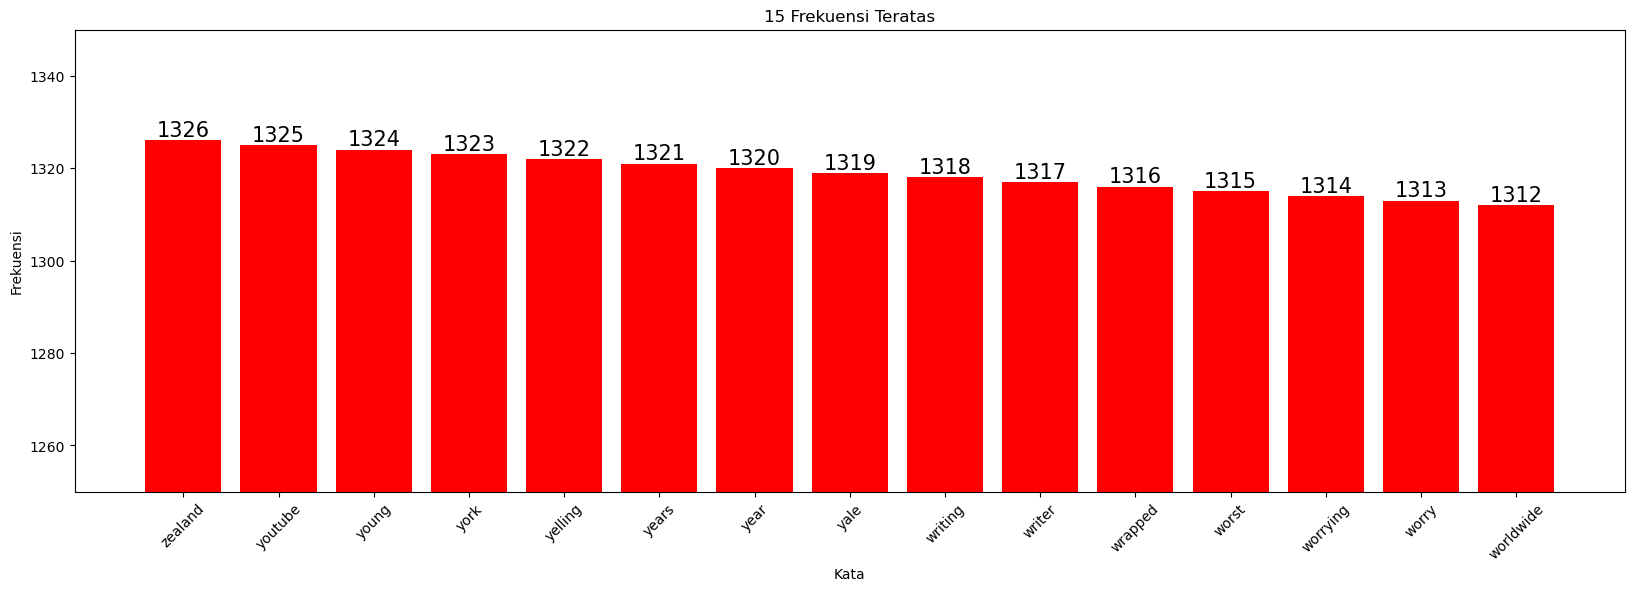

In [34]:
# Memvisualisasikan data untuk 15 frekuensi teratas
Kata = list(Dictionary.keys())[:15]
Frekuensi = [vectorizer.vocabulary_[term] for term in Kata]

plt.figure(figsize=(20,6))
bars = plt.bar(Kata, Frekuensi, color='red')
plt.ylabel('Frekuensi')
plt.xlabel('Kata')
plt.title('15 Frekuensi Teratas')

for bar, freq in zip(bars, Frekuensi):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(freq), ha='center', va='bottom', fontsize=15, rotation=0)
plt.xticks(rotation=45)
plt.ylim(1250, 1350)
plt.show()